In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn import decomposition
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

import time

###1. Loading and Processing MNIST

In [0]:
link1='https://drive.google.com/open?id=1LAXOvFLyMmK8Pkdw6efWhGHtIQpkGnYd'

fluff, id = link1.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv') 
training_data  = pd.read_csv('train.csv')

1LAXOvFLyMmK8Pkdw6efWhGHtIQpkGnYd


In [0]:
labels  = training_data['label']
training_data = training_data.drop("label",axis=1)
print(training_data.shape)

(42000, 784)


In [0]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(training_data)
print(standardized_data.shape)

(42000, 784)


In [0]:
covar_matrix = np.matmul(standardized_data.T , standardized_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)
print(covar_matrix)

The shape of variance matrix =  (784, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(training_data, labels, test_size=0.25, random_state=49)

###Decision Tree on Original Data (Default Settings)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(training_data, labels, test_size=0.25, random_state=49)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

X_train_org=X_train
y_train_org=y_train
X_test_org=X_test
y_test_org=y_test

clf.score(X_test,y_test)

0.8504761904761905

###PCA

0.530751024044577

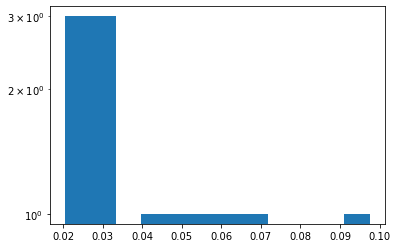

In [0]:
from sklearn.decomposition import PCA
n_components = 12
pca = PCA(n_components=n_components).fit(training_data)

training_data_pca = pca.transform(training_data)
plt.hist(pca.explained_variance_ratio_, bins=n_components, log=True)
pca.explained_variance_ratio_.sum()

In [0]:
def PCA_Decision_Tree (training_data, components):
  #Reducing to mentioned components
  n_components = components
  pca = PCA(n_components).fit(training_data)
  training_data_pca = pca.transform(training_data)

  #Applying Decision Tree

  X_train, X_test, y_train, y_test = train_test_split(training_data_pca, labels, test_size=0.25, random_state=49)
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  score=clf.score(X_test,y_test)

  print(components,score)

  return

In [0]:
training_data_pca.shape

(42000, 12)

###Decision Tree on PCA Data

In [0]:
from sklearn.decomposition import PCA
n_components = 784
pca = PCA(n_components=n_components).fit(training_data)
training_data_pca = pca.transform(training_data)
#print(X_train)
X_train, X_test, y_train, y_test = train_test_split(training_data_pca, labels, test_size=0.25, random_state=49)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#print(X_train)
score=clf.score(X_test,y_test)
print(score)

0.7963809523809524


In [0]:
dimensions=784

while dimensions >= 1:
  PCA_Decision_Tree (training_data, dimensions)
  dimensions=int(dimensions/2)


784 0.7925714285714286
392 0.7980952380952381
196 0.8071428571428572
98 0.8134285714285714
49 0.8195238095238095
24 0.8286666666666667
12 0.8278095238095238
6 0.7317142857142858
3 0.430952380952381
1 0.24866666666666667


In [0]:
from prettytable import PrettyTable
t = PrettyTable(['DT_score', 'Dimensions','Varience_Explained', 'PCA_time','DecisionTree_time', 'total_time',])

def PCA_Decision_Tree (training_data, components):

  #Reducing to mentioned components
  pca_start_time = time.time()
  n_components = components
  pca = PCA(n_components).fit(training_data)
  training_data_pca = pca.transform(training_data)
  pca_time = time.time() - pca_start_time
  #Applying Decision Tree

  X_train, X_test, y_train, y_test = train_test_split(training_data_pca, labels, test_size=0.25, random_state=49)

  clf_start_time = time.time()
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  clf_time = time.time() - clf_start_time
  score=clf.score(X_test,y_test)
  score = str(round(score, 4))

  total_time = pca_time+clf_time
  pca_time = str(round(pca_time, 4))
  clf_time = str(round(clf_time, 4))
  total_time = str(round(total_time, 4))

  explained_variance  = pca.explained_variance_ratio_.sum() 
  explained_variance = str(round(explained_variance, 4))

  t.add_row([score, components , explained_variance, pca_time, clf_time ,total_time ])
  

  return

dimensions=784

while dimensions >= 1:
  PCA_Decision_Tree (training_data, dimensions)
  dimensions=int(dimensions/2)


In [0]:
print(t)

+----------+------------+--------------------+----------+-------------------+------------+
| DT_score | Dimensions | Varience_Explained | PCA_time | DecisionTree_time | total_time |
+----------+------------+--------------------+----------+-------------------+------------+
|  0.7985  |    784     |        1.0         |  6.1585  |      75.1557      |  81.3142   |
|  0.7968  |    392     |       0.9953       | 11.3525  |      40.4033      |  51.7558   |
|  0.8042  |    196     |       0.9651       |  6.6646  |      19.8445      |   26.509   |
|  0.8159  |     98     |       0.9127       |  4.166   |       9.1818      |  13.3478   |
|  0.8212  |     49     |       0.8223       |  3.9707  |       4.4716      |   8.4423   |
|  0.8266  |     24     |       0.6844       |  3.1472  |       1.9973      |   5.1445   |
|  0.8288  |     12     |       0.5308       |  2.7549  |       0.9312      |   3.6861   |
|  0.735   |     6      |       0.3763       |  2.3773  |       0.4204      |   2.7977   |

In [0]:
# Data input varied

#n_components = 12

from prettytable import PrettyTable
t = PrettyTable(['Score_default', 'DT_score_after', 'Input_data_points','Varience_Explained', 'PCA_time','DecisionTree_time', 'total_time',])

def PCA_Decision_Tree (training_data, components, input_data_points):
  X_train, X_test, y_train, y_test = train_test_split(training_data[:input_data_points], labels[:input_data_points], test_size=0.25, random_state=49)
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  score_before=clf.score(X_test,y_test)
  score_before = str(round(score_before, 4))

  #Reducing to mentioned components
  pca_start_time = time.time()
  n_components = components
  pca = PCA(n_components).fit(training_data[:input_data_points])
  training_data_pca = pca.transform(training_data[:input_data_points])
  pca_time = time.time() - pca_start_time
  #Applying Decision Tree

  X_train, X_test, y_train, y_test = train_test_split(training_data_pca, labels[:input_data_points], test_size=0.25, random_state=49)

  clf_start_time = time.time()
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  clf_time = time.time() - clf_start_time
  score=clf.score(X_test,y_test)
  score = str(round(score, 4))

  total_time = pca_time+clf_time
  pca_time = str(round(pca_time, 4))
  clf_time = str(round(clf_time, 4))
  total_time = str(round(total_time, 4))

  explained_variance  = pca.explained_variance_ratio_.sum() 
  explained_variance = str(round(explained_variance, 4))

  t.add_row([score_before, score, input_data_points , explained_variance, pca_time, clf_time ,total_time ])
  

  return

components=12
input_data_points=420000

while input_data_points >= 10000:
  PCA_Decision_Tree (training_data, components, input_data_points-1)
  input_data_points=input_data_points - 10000

print(t)

+---------------+----------------+-------------------+--------------------+----------+-------------------+------------+
| Score_default | DT_score_after | Input_data_points | Varience_Explained | PCA_time | DecisionTree_time | total_time |
+---------------+----------------+-------------------+--------------------+----------+-------------------+------------+
|     0.8529    |     0.8271     |       419999      |       0.5308       |  2.8459  |       0.881       |   3.727    |
|     0.8482    |     0.8223     |       409999      |       0.5308       |  2.7207  |       0.8824      |   3.6031   |
|     0.8485    |     0.8261     |       399999      |       0.5308       |  2.7849  |       0.8842      |   3.6691   |
|     0.8469    |     0.8231     |       389999      |       0.5308       |  2.6623  |       0.9035      |   3.5658   |
|     0.8498    |     0.8316     |       379999      |       0.5308       |  2.5187  |       0.8859      |   3.4046   |
|      0.85     |     0.8256     |      

###Decision Tree + PCA Evaluation 

###Decision Tree + PCA Evaluation : Coranking

In [0]:
pip install git+https://github.com/samueljackson92/coranking.git

  Cloning https://github.com/samueljackson92/coranking.git to /tmp/pip-req-build-wzcn78d_
  Running command git clone -q https://github.com/samueljackson92/coranking.git /tmp/pip-req-build-wzcn78d_
  Created wheel for coranking: filename=coranking-0.1.1-cp36-cp36m-linux_x86_64.whl size=87039 sha256=03983787354773227ca6ce0e8f264c67b7bc766f3d84ea527d4639a6038544af
  Stored in directory: /tmp/pip-ephem-wheel-cache-brm6qfny/wheels/8e/e0/11/4ae911b6fc472b8bf6087e29d861d2b798c119603adf4b93fa
Successfully built coranking


In [0]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC


In [0]:
n_components = 2
pca = PCA(n_components).fit(training_data)
training_data_pca = pca.transform(training_data)
X_train, X_test, y_train, y_test = train_test_split(training_data_pca, labels, test_size=0.25, random_state=49)

In [0]:
training_data_pca[1:10]

array([[1701.451822  , -360.54718703],
       [-886.89422884, -293.768465  ],
       [-165.75587704,  300.18760235],
       [1923.70980137, -449.15247557],
       [ 487.75188937,  192.75871312],
       [-672.3232433 ,  464.80153933],
       [-114.38232411,  -20.73039439],
       [ 350.22914983,  141.0131749 ],
       [ 297.3920293 , -807.41067966]])

In [0]:
Q = coranking.coranking_matrix(training_data[0:10000], training_data_pca[0:10000])

In [0]:
Q

array([[11., 11.,  9., ...,  0.,  0.,  0.],
       [ 3.,  5., 11., ...,  0.,  0.,  0.],
       [ 5.,  5.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1.,  0., ...,  3., 22.,  2.],
       [ 1.,  1.,  1., ...,  0., 27.,  4.],
       [ 0.,  0.,  0., ...,  2.,  3., 65.]])

In [0]:
trust_pca = trustworthiness(Q, min_k=1, max_k=50)
cont_pca = continuity(Q, min_k=1, max_k=50)
lcmc_pca = LCMC(Q, min_k=1, max_k=50)

In [0]:
trust_pca

array([0.7352753 , 0.73260137, 0.73263175, 0.73403317, 0.73482595,
       0.73440045, 0.73456666, 0.73472934, 0.73497732, 0.7348812 ,
       0.73493382, 0.7350541 , 0.73502753, 0.73492877, 0.73506585,
       0.73497224, 0.73501359, 0.73491213, 0.73508872, 0.73513678,
       0.73527163, 0.73534574, 0.73535642, 0.73549192, 0.73570383,
       0.73577721, 0.735802  , 0.73582841, 0.73571268, 0.73584535,
       0.73592645, 0.73592869, 0.73606111, 0.73601212, 0.73596983,
       0.73608757, 0.73613289, 0.73620139, 0.7361178 , 0.73612852,
       0.7360999 , 0.73615246, 0.7362125 , 0.73623097, 0.73615342,
       0.73612691, 0.73609022, 0.73603305, 0.73603132])

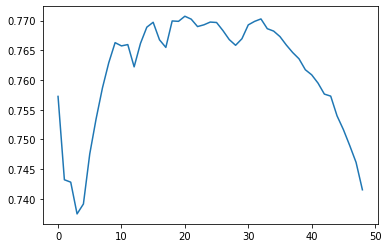

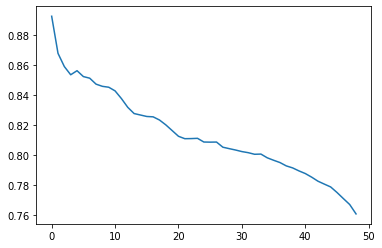

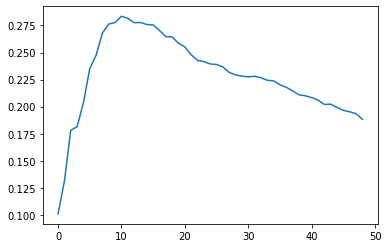

In [0]:
plt.plot(trust_pca)
plt.show()
plt.plot(cont_pca)
plt.show()
plt.plot(lcmc_pca)
plt.show()

In [0]:
trust_pca.sum()

37.313333335155185

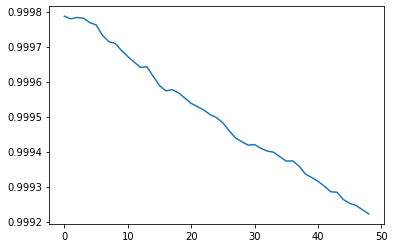

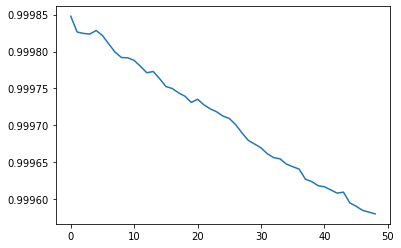

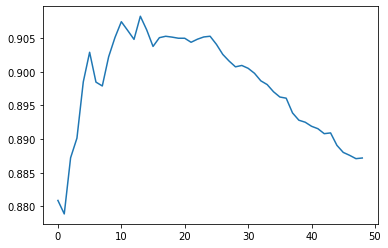

In [0]:
n_components = 96
pca = PCA(n_components).fit(training_data)
training_data_pca = pca.transform(training_data)
X_train, X_test, y_train, y_test = train_test_split(training_data_pca, labels, test_size=0.25, random_state=49)

Q = coranking.coranking_matrix(training_data[0:1000], training_data_pca[0:1000])

trust_pca = trustworthiness(Q, min_k=1, max_k=50)
cont_pca = continuity(Q, min_k=1, max_k=50)
lcmc_pca = LCMC(Q, min_k=1, max_k=50)

plt.plot(trust_pca)
plt.show()
plt.plot(cont_pca)
plt.show()
plt.plot(lcmc_pca)
plt.show()

In [0]:
trust_pca.sum()

49.0

In [0]:
n_components = 784

while n_components >= 1:
  pca = PCA(n_components).fit(training_data)
  training_data_pca = pca.transform(training_data)
  X_train, X_test, y_train, y_test = train_test_split(training_data_pca, labels, test_size=0.25, random_state=49)

  Q = coranking.coranking_matrix(training_data[0:100], training_data_pca[0:100])

  trust_pca = trustworthiness(Q, min_k=1, max_k=50)
  cont_pca = continuity(Q, min_k=1, max_k=50)
  lcmc_pca = LCMC(Q, min_k=1, max_k=50)

  print("components: ", n_components,"\ttrust : ",(trust_pca.sum()/50),"\tcont: ",cont_pca.sum()/50,"\tlcmc: ",lcmc_pca.sum()/50)

  n_components=int(n_components/2)


components:  784 	trust :  0.98 	cont:  0.98 	lcmc:  0.7398989898989901
components:  392 	trust :  0.979780341039969 	cont:  0.9798484803775035 	lcmc:  0.7320288285046535
components:  196 	trust :  0.9786519712657238 	cont:  0.9791414293164525 	lcmc:  0.7095694062724054
components:  98 	trust :  0.9747556558731278 	cont:  0.9770963819613218 	lcmc:  0.674822245342748
components:  49 	trust :  0.9646102593090717 	cont:  0.9712789846856892 	lcmc:  0.6235234234962179
components:  24 	trust :  0.9447141041350743 	cont:  0.957517173915042 	lcmc:  0.5540780897277214
components:  12 	trust :  0.9166848899695077 	cont:  0.9361659057944811 	lcmc:  0.4769309717709278
components:  6 	trust :  0.8781828737595551 	cont:  0.9000053950527375 	lcmc:  0.39802707335032816
components:  3 	trust :  0.8061055232097182 	cont:  0.8488052070475577 	lcmc:  0.29328125389126264
components:  1 	trust :  0.6508690941184108 	cont:  0.7028571707391084 	lcmc:  0.12591062258305882


###Decision Tree + PCA Evaluation : Eigen Vectors

In [0]:
# Invoke SKlearn's PCA method
n_components = 12
pca = PCA(n_components=n_components).fit(training_data)

eigenvalues = pca.components_.reshape(n_components, 28, 28)

# Extracting the PCA components ( eignevalues )
#eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_
plt.imshow(eigenvalues[11].reshape(28,28), cmap='jet')
print(eigenvalues)
plt.show()

# n_row = 4
# n_col = 7

# # Plot the first 8 eignenvalues
# plt.figure(figsize=(13,12))
# for i in list(range(n_row * n_col)):
#     offset =0
#     plt.subplot(n_row, n_col, i + 1)
#     plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
#     title_text = 'Eigenvalue ' + str(i + 1)
#     plt.title(title_text, size=6.5)
#     plt.xticks(())
#     plt.yticks(())
# plt.show()

NameError: ignored

[[-3.57976081e-19 -5.55111512e-17  1.11022302e-16 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-5.15181155e-19 -2.22044605e-16 -5.55111512e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.57308707e-19  1.38777878e-16 -5.55111512e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [ 0.00000000e+00  3.92135674e-02 -3.17958467e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -1.04224187e-01 -5.73645657e-02 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -1.18477093e-01 -1.11055902e-01 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


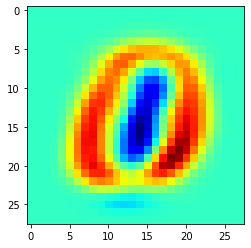

In [0]:
n_components = 784
pca = PCA(n_components=n_components).fit(training_data)

eigenvalues = pca.components_.reshape(n_components, 28, 28)

# Extracting the PCA components ( eignevalues )
#eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_
print(eigenvalues)
plt.imshow(eigenvalues[0].reshape(28,28), cmap='jet')
plt.show()

In [0]:

a=np.array([0.7572449 , 0.74321244, 0.74280702, 0.73745989, 0.73913043,
       0.74755064, 0.75345104, 0.75865714, 0.7629199 , 0.76629586,
       0.76575027, 0.76597137, 0.76222115, 0.76616924, 0.76890043,
       0.76972682, 0.76677266, 0.76549425, 0.76994811, 0.76988489,
       0.7707423 , 0.7702529 , 0.76900334, 0.7692979 , 0.76976129,
       0.76968849, 0.76833647, 0.76681366, 0.76584975, 0.76695413,
       0.76928789, 0.76987864, 0.77029091, 0.76864767, 0.76824316,
       0.7673138 , 0.76589681, 0.76463777, 0.76357724, 0.76173418,
       0.76087933, 0.75948467, 0.75763455, 0.75729308, 0.75397222,
       0.75166073, 0.74897285, 0.74613636, 0.74152276])

(a.sum()/50)*100

74.62666660000001

###Decision Tree + uMAP Data

In [0]:
import umap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
reducer = umap.UMAP(random_state=42,n_components=16)
embedding = reducer.fit_transform(training_data)

In [0]:
embedding.shape

(42000, 16)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(embedding, labels, test_size=0.25, random_state=49)

clf_start_time = time.time()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
score=clf.score(X_test,y_test)


In [0]:
print(score)

0.9461904761904761


In [0]:
embedding = reducer.fit_transform(mnist.data)

fig, ax = plt.subplots(figsize=(12, 10))
color = mnist.target.astype(int)
plt.scatter(
    embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

plt.show()

In [0]:
from prettytable import PrettyTable
t = PrettyTable(['uMAP_score', 'Dimensions', 'uMAP_time','DecisionTree_time', 'total_time',])

def uMAP_Decision_Tree (training_data, components):

  #Reducing to mentioned components
  uMAP_start_time = time.time()
  n_components = components

  reducer = umap.UMAP(random_state=42,n_components=components)
  training_data_umap= reducer.fit_transform(training_data)
  uMAP_time = time.time() - uMAP_start_time
  #Applying Decision Tree

  X_train, X_test, y_train, y_test = train_test_split(training_data_umap, labels, test_size=0.25, random_state=49)

  clf_start_time = time.time()
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  clf_time = time.time() - clf_start_time
  score=clf.score(X_test,y_test)
  score = str(round(score, 4))

  total_time = uMAP_time+clf_time
  uMAP_time = str(round(uMAP_time, 4))
  clf_time = str(round(clf_time, 4))
  total_time = str(round(total_time, 4))


  t.add_row([score, components , uMAP_time, clf_time ,total_time ])
  
  return

dimensions=784

while dimensions >= 1:
  uMAP_Decision_Tree (training_data, dimensions)
  dimensions=int(dimensions/2)

In [0]:
print(t)

NameError: ignored